In [1]:
%matplotlib notebook
import pandas as pd
#from IPython.display import display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()


In [2]:
pd.set_option('display.max_rows', None)
country_data = "/Users/shilpa/Desktop/Boringppl_project/WasteManagement/Data/country_level_data_0.csv"
country_data_df = pd.read_csv(country_data, encoding = 'utf-8')
pd.set_option('display.max_columns', None)
country_data_df.head(1)


,iso3c,region_id,country_name,income_id,gdp,composition_food_organic_waste_percent,composition_glass_percent,composition_metal_percent,composition_other_percent,composition_paper_cardboard_percent,composition_plastic_percent,composition_rubber_leather_percent,composition_wood_percent,composition_yard_garden_green_waste_percent,other_information_information_system_for_solid_waste_management,other_information_national_agency_to_enforce_solid_waste_laws_and_regulations,other_information_national_law_governing_solid_waste_management_in_the_country,other_information_ppp_rules_and_regulations,other_information_summary_of_key_solid_waste_information_made_available_to_the_public,population_population_number_of_people,special_waste_agricultural_waste_tons_year,special_waste_construction_and_demolition_waste_tons_year,special_waste_e_waste_tons_year,special_waste_hazardous_waste_tons_year,special_waste_industrial_waste_tons_year,special_waste_medical_waste_tons_year,total_msw_total_msw_generated_tons_year,waste_collection_coverage_rural_percent_of_geographic_area,waste_collection_coverage_rural_percent_of_households,waste_collection_coverage_rural_percent_of_population,waste_collection_coverage_rural_percent_of_waste,waste_collection_coverage_total_percent_of_geographic_area,waste_collection_coverage_total_percent_of_households,waste_collection_coverage_total_percent_of_population,waste_collection_coverage_total_percent_of_waste,waste_collection_coverage_urban_percent_of_geographic_area,waste_collection_coverage_urban_percent_of_households,waste_collection_coverage_urban_percent_of_population,waste_collection_coverage_urban_percent_of_waste,waste_treatment_anaerobic_digestion_percent,waste_treatment_compost_percent,waste_treatment_controlled_landfill_percent,waste_treatment_incineration_percent,waste_treatment_landfill_unspecified_percent,waste_treatment_open_dump_percent,waste_treatment_other_percent,waste_treatment_recycling_percent,waste_treatment_sanitary_landfill_landfill_gas_system_percent,waste_treatment_unaccounted_for_percent,waste_treatment_waterways_marine_percent,where_where_is_this_data_measured
0,ABW,LCN,Aruba,HIC,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Yes,Yes,Yes,Yes,103187.0,NaN,NaN,NaN,NaN,NaN,NaN,88132.0167,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,11.0,NaN,89.0,NaN,NaN


In [3]:
Total_MSW = country_data_df[['country_name', 
                       'income_id', 
                       'gdp', 
                       'population_population_number_of_people', 
                       'total_msw_total_msw_generated_tons_year']]
Total_MSW.fillna(0).set_index('country_name').head(3)

,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year
country_name,,,,
Aruba,HIC,0.000000e+00,103187.0,8.813202e+04
Afghanistan,LIC,2.141361e+10,34656032.0,5.628525e+06
Angola,LMC,1.030423e+11,25096150.0,4.213644e+06


In [4]:
df_world = Total_MSW
df_world.fillna(0).head(3)

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year
0,Aruba,HIC,0.000000e+00,103187.0,8.813202e+04
1,Afghanistan,LIC,2.141361e+10,34656032.0,5.628525e+06
2,Angola,LMC,1.030423e+11,25096150.0,4.213644e+06


In [5]:
Treatment_LIC = df_world.groupby('income_id').get_group('LIC').fillna(0).drop_duplicates().set_index('country_name')
df_LIC= pd.DataFrame(Treatment_LIC)
df_LIC['default_rank'] = df_LIC['total_msw_total_msw_generated_tons_year'].rank()
df_LIC.reset_index()
df_LIC.reset_index().head(3)


,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,default_rank
0,Afghanistan,LIC,2.141361e+10,34656032.0,5628525.37,29.0
1,Burundi,LIC,2.297241e+09,6741569.0,1872016.00,17.0
2,Benin,LIC,9.102277e+09,5521763.0,685936.01,7.0


In [6]:
Treatment_LMC = df_world.groupby('income_id').get_group('LMC').fillna(0).drop_duplicates().set_index('country_name')
df_LMC= pd.DataFrame(Treatment_LMC)
df_LMC['default_rank'] = df_LMC['total_msw_total_msw_generated_tons_year'].rank()
df_LMC.reset_index()
df_LMC.reset_index().head(3)

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,default_rank
0,Angola,LMC,1.030423e+11,25096150.0,4.213644e+06,34.0
1,Bangladesh,LMC,1.677713e+11,155727053.0,1.477850e+07,41.0
2,Bolivia,LMC,2.675834e+10,10724705.0,2.219052e+06,24.0


In [7]:
Treatment_UMC = df_world.groupby('income_id').get_group('UMC').fillna(0).drop_duplicates().set_index('country_name')
df_UMC= pd.DataFrame(Treatment_UMC)
df_UMC['default_rank'] = df_UMC['total_msw_total_msw_generated_tons_year'].rank()
df_UMC.reset_index()
df_UMC.reset_index().head(3)

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,default_rank
0,Albania,UMC,1.347108e+10,2880703.0,1142964.00,26.0
1,Armenia,UMC,1.150200e+10,2906220.0,492800.00,22.0
2,American Samoa,UMC,5.345551e+08,55599.0,18989.49,6.0


In [8]:
Treatment_HIC = df_world.groupby('income_id').get_group('HIC').fillna(0).drop_duplicates().set_index('country_name')
df_HIC= pd.DataFrame(Treatment_HIC)
df_HIC['default_rank'] = df_HIC['total_msw_total_msw_generated_tons_year'].rank()
df_HIC.reset_index()
df_HIC.reset_index()
a = df_HIC.reset_index()
a.head(3)

,country_name,income_id,gdp,population_population_number_of_people,total_msw_total_msw_generated_tons_year,default_rank
0,Aruba,HIC,0.000000e+00,103187.0,8.813202e+04,21.0
1,Andorra,HIC,3.319880e+09,82431.0,4.300000e+04,13.0
2,United Arab Emirates,HIC,3.842225e+11,9269612.0,5.413453e+06,61.0


In [21]:
# plt.scatter(df_HIC.default_rank, df_HIC.gdp)
# #A correlation will become clear, when you display the GDP per capita on a logarithmic scale
# #plt.yscale('log')
# plt.xlabel('waste rank')
# plt.ylabel('GDP per Capita [in USD]')
# plt.title('World waste in HIC')
# #plt.xticks([1000, 10000, 100000],['1k', '10k', '100k'])
# plt.show()
# plt.show()

<IPython.core.display.Javascript object>


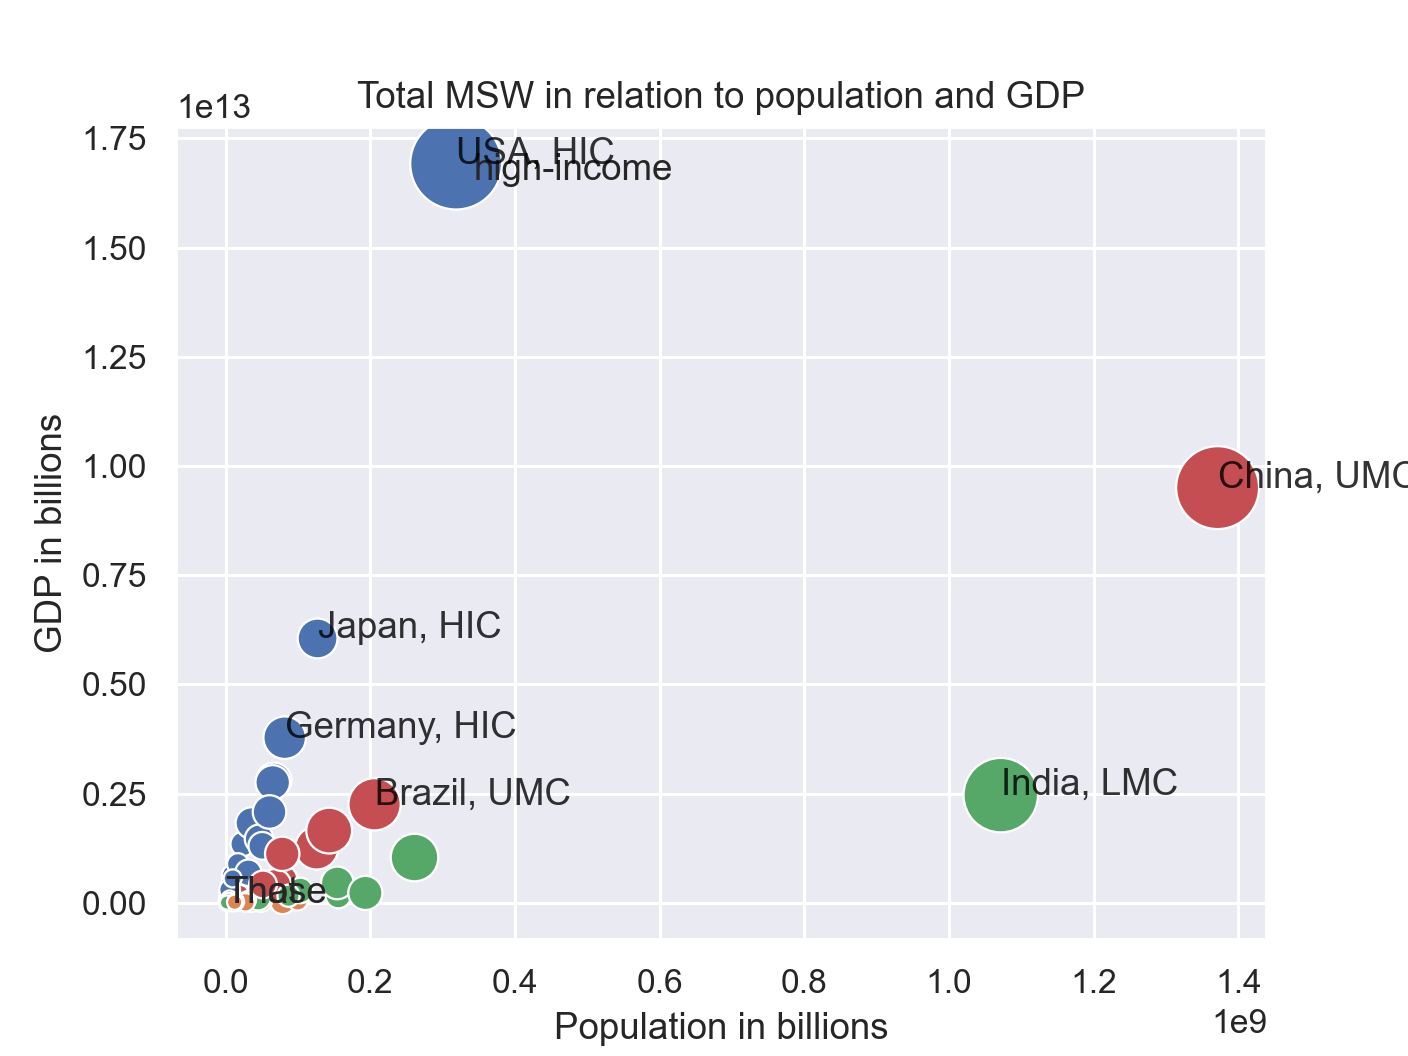

In [28]:
#plt.figure(dpi=100)

# Store population as a numpy array: np_pop
np_pop = np.array(Total_MSW.total_msw_total_msw_generated_tons_year)

#Use seaborn scatterplot for better customization
sns.scatterplot(Total_MSW['population_population_number_of_people'], 
                Total_MSW['gdp'], 
                hue = Total_MSW['income_id'],
                legend = False,
                size = np_pop, sizes=(20,900))



# for i in range(Total_MSW.shape[0]):
#     plt.text(x=Total_MSW.population_population_number_of_people[i]+0.3,y=Total_MSW.gdp[i]+0.3,s=Total_MSW.country_name[i], 
#           fontdict=dict(size=10),
#           bbox=dict(alpha=0.5))

#add text to certain points
plt.text(3.42347e+08, 1.65439e+13, 'high-income')
plt.text(6, 9.5, 'That')
plt.text(8.2, 14, 'Those')

plt.text(Total_MSW.population_population_number_of_people[Total_MSW.country_name=='United States'],\
         Total_MSW.gdp[Total_MSW.country_name=='United States'], "USA, HIC", color='black', alpha=0.8)   
plt.text(Total_MSW.population_population_number_of_people[Total_MSW.country_name=='China'],Total_MSW.gdp[Total_MSW.country_name=='China'],"China, UMC", color='black', alpha=0.8)    
plt.text(Total_MSW.population_population_number_of_people[Total_MSW.country_name=='India'],Total_MSW.gdp[Total_MSW.country_name=='India'],"India, LMC", color='black', alpha=0.8)   
plt.text(Total_MSW.population_population_number_of_people[Total_MSW.country_name=='Germany'],Total_MSW.gdp[Total_MSW.country_name=='Germany'],"Germany, HIC", color='black', alpha=0.8) 
plt.text(Total_MSW.population_population_number_of_people[Total_MSW.country_name=='Japan'],Total_MSW.gdp[Total_MSW.country_name=='Japan'],"Japan, HIC", color='black', alpha=0.8)  
plt.text(Total_MSW.population_population_number_of_people[Total_MSW.country_name=='Brazil'],Total_MSW.gdp[Total_MSW.country_name=='Brazil'],"Brazil, UMC", color='black', alpha=0.8)    
    


plt.grid(True)
# plt.xscale('log')
#plt.yscale('log')
plt.xlabel('Population in billions')
plt.ylabel('GDP in billions')
plt.title('Total MSW in relation to population and GDP')
#plt.savefig('Scatter_plot_Ranking_1.png')
plt.show()